#### Q2. Quantitative Modelling in Python or R 
Please collect the EUR/USD daily exchange rate from FRED and complete the following tasks related to Value-at-Risk forecasting from a GARCH-type model with a Python or R script:

a) Collect a daily series of a macroeconomic/financial indicator, which will influence the log return of EUR/USD from publicly available source. Please describe your choice and explain why.

b) Run a GARCH-type model on the log return of EUR/USD with the series in a) as an exogenous variable in the mean process.

c) Based on b), please prepare a plot of conditional distribution curve for a specific date, on which you should indicate the value at risk of 10% in total, both tails. Prepare a summary to interpret this plot.


### Import libraries and load documents

Load and clean the EUR/USD daily exchange rate data to compute log returns.
    
Choose an exogenous macroeconomic or financial variable (in this case, the U.S. 10-Year Treasury Yield) that could impact the EUR/USD exchange rate.

Align the Treasury Yield data with the EUR/USD returns, creating a merged dataset with two columns: Log_Returns (dependent variable) and US_10Y_Yield (exogenous variable).


In [3]:
import pandas as pd
import numpy as np

# Load the EUR/USD dataset
file_path = "DEXUSEU.csv"
eur_usd_data = pd.read_csv(file_path, parse_dates=['DATE'], index_col='DATE')

# Convert the 'DEXUSEU' column to numeric, coercing any errors to NaN
eur_usd_data['DEXUSEU'] = pd.to_numeric(eur_usd_data['DEXUSEU'], errors='coerce')

# Drop any rows with NaN values (caused by conversion errors or missing values)
eur_usd_data = eur_usd_data.dropna()

# Calculate log returns for EUR/USD
eur_usd_data['Log_Returns'] = np.log(eur_usd_data['DEXUSEU'] / eur_usd_data['DEXUSEU'].shift(1)) * 100
eur_usd_log_returns = eur_usd_data['Log_Returns'].dropna()

# Display the first few rows to confirm
print(eur_usd_log_returns.head())


DATE
2019-10-21   -0.089686
2019-10-22   -0.062828
2019-10-23   -0.179727
2019-10-24   -0.180050
2019-10-25   -0.153298
Name: Log_Returns, dtype: float64


### Choice of 10-Year U.S. Treasury Yield as an Exogenous Variable
The 10-year U.S. Treasury yield is a key macroeconomic indicator influencing the EUR/USD exchange rate. Treasury yields reflect expectations about U.S. interest rates, inflation, and economic health, affecting capital flows and the attractiveness of dollar-denominated assets:

1. **Interest Rate Differential**: Higher Treasury yields make U.S. assets more attractive, often leading to USD appreciation as foreign investors increase demand for the dollar.
2. **Macroeconomic Sentiment**: Rising yields can indicate strong U.S. economic growth, which may boost USD strength. Conversely, falling yields might signal an economic slowdown, potentially weakening the USD.

By including Treasury yields as an exogenous variable in the GARCH model, we capture macroeconomic factors that influence EUR/USD returns and volatility.



In [5]:
# Load the U.S. 10-Year Treasury Yield data
yield_file_path = "DGS10.csv"
us_treasury_yield = pd.read_csv(yield_file_path, parse_dates=['DATE'], index_col='DATE')

# Convert the 'DGS10' column to numeric, coercing errors to NaN
us_treasury_yield['DGS10'] = pd.to_numeric(us_treasury_yield['DGS10'], errors='coerce')
us_treasury_yield = us_treasury_yield.dropna()

# Rename the column for clarity
us_treasury_yield.rename(columns={'DGS10': 'US_10Y_Yield'}, inplace=True)

# Merge with EUR/USD log returns
merged_data = pd.concat([eur_usd_log_returns, us_treasury_yield], axis=1).dropna()


In [6]:
merged_data

,Log_Returns,US_10Y_Yield
DATE,,
2019-10-24,-0.180050,1.77
2019-10-25,-0.153298,1.80
2019-10-28,0.117249,1.85
2019-10-29,0.207105,1.84
2019-10-30,0.053957,1.78
...,...,...
2024-10-11,0.155485,4.08
2024-10-15,-0.393755,4.03
2024-10-16,-0.238839,4.02


## Define and Fit the GARCH Model

The GARCH model setup involves specifying a **GARCH(1,1)** structure, which includes one lag for both ARCH and GARCH terms to capture time-varying volatility. We incorporate an intercept and the U.S. 10-Year Treasury Yield as an exogenous variable in the mean equation, creating what is known as an **ARX-GARCH** model. The mean equation of the model is represented as:

**Mean Equation:**
- R_t = α + β * X_t + ε_t
  - Where R_t denotes the log return of EUR/USD, X_t is the U.S. 10-Year Treasury Yield (exogenous variable), and ε_t is the residual error term governed by the GARCH structure.

The variance equation is specified as:

**Variance Equation:**
- σ_t^2 = ω + α_1 * ε_{t-1}^2 + β_1 * σ_{t-1}^2
  - Where σ_t^2 represents the conditional variance of ε_t, ω is a constant term reflecting baseline variance, and α_1 and β_1 capture the impact of lagged squared returns and past variance, respectively.

To estimate the model parameters, we employ **Maximum Likelihood Estimation (MLE)**. After fitting, the model's summary output is analyzed to evaluate the significance of the exogenous variable, which tests if the U.S. 10-Year Treasury Yield meaningfully impacts EUR/USD returns. The **GARCH parameters** (ω, α, and β) are also examined to understand the persistence and behavior of volatility in the exchange rate returns.
rate returns.


In [8]:
from arch import arch_model

# Define a GARCH(1,1) model with an ARX mean model (log returns with exogenous Treasury Yield)
model = arch_model(merged_data['Log_Returns'], vol='Garch', p=1, q=1, mean='ARX', x=merged_data[['US_10Y_Yield']])
garch_result = model.fit()
print(garch_result.summary())


Iteration:      1,   Func. Count:      7,   Neg. LLF: 234017235249910.7
Iteration:      2,   Func. Count:     18,   Neg. LLF: 7148413487.571654
Iteration:      3,   Func. Count:     27,   Neg. LLF: 40723.32599983817
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2041.1330804225859
Iteration:      5,   Func. Count:     44,   Neg. LLF: 742.3377004814668
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1039.7913336836218
Iteration:      7,   Func. Count:     59,   Neg. LLF: 739.2898549686911
Iteration:      8,   Func. Count:     66,   Neg. LLF: 732.8934295788104
Iteration:      9,   Func. Count:     72,   Neg. LLF: 732.8888730412792
Iteration:     10,   Func. Count:     78,   Neg. LLF: 732.8887592312176
Iteration:     11,   Func. Count:     84,   Neg. LLF: 732.8887585492582
Optimization terminated successfully    (Exit mode 0)
            Current function value: 732.8887585492582
            Iterations: 11
            Function evaluations: 84
            Gradient evaluations: 

The AR-X GARCH model for EUR/USD log returns reveals that the 10-year U.S. Treasury yield has an insignificant effect on returns, with a coefficient of -0.0022 and a high p-value, suggesting no strong direct influence on the exchange rate’s short-term movements. In the volatility model, however, significant values for **alpha (0.0555)** and **beta (0.9282)** indicate that volatility is influenced by past shocks and is highly persistent over time. This implies that volatility tends to remain elevated once it rises, characteristic of financial markets. This model thus captures the time-dependent nature of volatility well, even though the yield itself does not significantly impact return levels.

### Part c Based on b), please prepare a plot of conditional distribution curve for a specific date, on which you should indicate the value at risk of 10% in total, both tails. Prepare a summary to interpret this plot.


To plot the conditional distribution curve with VaR indication, we select a specific date for forecasting. Here we take the latest available date in the dataset. 

Using the GARCH model, we perform a 1-step-ahead forecast to obtain the conditional mean and variance for this date, using the most recent Treasury Yield value as an exogenous input. 

We calculate the 10% VaR bounds, with 5% on each tail, by adjusting the conditional mean by 1.645 times the conditional standard deviation to set the upper and lower bounds. 

Finally, we plot a normal distribution curve centered around the conditional mean, adding vertical lines to indicate the calculated VaR bounds, representing the 90% confidence interval for returns.


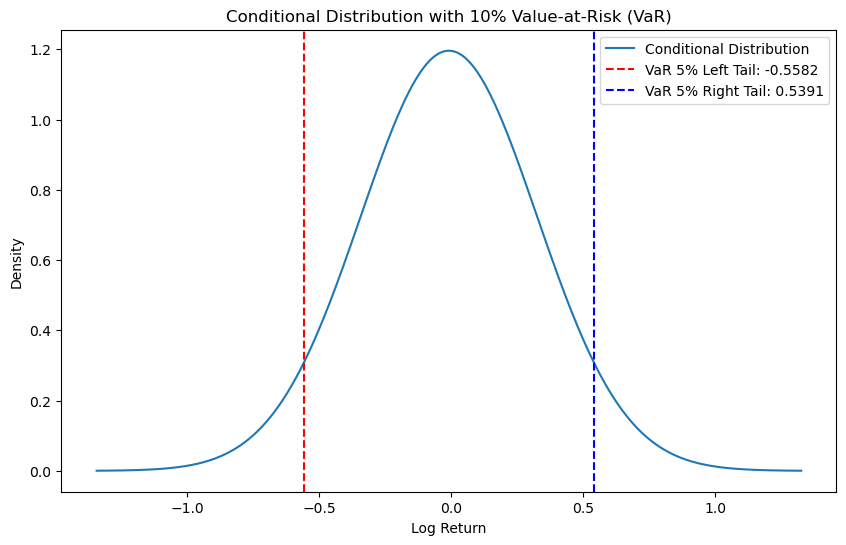

In [11]:
import matplotlib.pyplot as plt

# Choose a specific date for the VaR plot
forecast_date = '2024-10-18'  # Example date, adjust as needed
# Get the last available value for US_10Y_Yield as a proxy for expected future values
last_yield_value = merged_data['US_10Y_Yield'].iloc[-1]

# Create a DataFrame to hold the expected future values for US_10Y_Yield
exog_forecast = pd.DataFrame(last_yield_value, index=pd.date_range(start=forecast_date, periods=1), columns=['US_10Y_Yield'])

# Forecast with exogenous variables for the chosen date
forecast = garch_result.forecast(start=forecast_date, horizon=1, x=exog_forecast)

# Extract conditional mean and variance for the specified date
cond_variance = forecast.variance.loc[forecast_date].values[0]
cond_mean = forecast.mean.loc[forecast_date].values[0]
std_dev = np.sqrt(cond_variance)

# Calculate the 10% VaR (5% in each tail)
var_left = cond_mean - 1.645 * std_dev
var_right = cond_mean + 1.645 * std_dev

# Plot the conditional distribution curve
x = np.linspace(cond_mean - 4 * std_dev, cond_mean + 4 * std_dev, 500)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - cond_mean) / std_dev) ** 2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Conditional Distribution")
plt.axvline(var_left, color='red', linestyle='--', label=f'VaR 5% Left Tail: {var_left:.4f}')
plt.axvline(var_right, color='blue', linestyle='--', label=f'VaR 5% Right Tail: {var_right:.4f}')
plt.title('Conditional Distribution with 10% Value-at-Risk (VaR)')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.show()


---

### Interpretation of Conditional Distribution Plot with VaR Indicators
The conditional distribution plot forecasts EUR/USD returns on a specific date, with Value-at-Risk (VaR) at a 10% confidence level (5% in each tail) marking extreme outcomes:

1. **Left Tail VaR (5%)**: Represents the downside risk, indicating the worst 5% of potential returns for the EUR/USD pair.
2. **Right Tail VaR (5%)**: Shows the upside potential, reflecting the best 5% of returns driven by favorable conditions.
3. **Volatility Insight**: The spread of the distribution reflects the level of risk or uncertainty in returns. A wider distribution implies higher volatility, while a narrower one suggests lower volatility.

This plot helps assess potential extreme movements in EUR/USD. Including Treasury yields enhances the model's ability to reflect macroeconomic drivers.
